In [1]:
# 필요한 패키지 설치
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('data.csv')

In [5]:
# 데이터 구조 확인(컬럼 타입과 결측치 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    241 non-null    object 
 1   USPHCI  241 non-null    float64
 2   INDPRO  241 non-null    float64
 3   RSI     241 non-null    int64  
 4   NFP     241 non-null    int64  
 5   HYS     241 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


In [33]:
df.drop(['DATE','RSI', 'NFP'], axis=1, inplace=True)

In [34]:
# 클러스터 돌리기 전 변수를 생성
df_f = df.copy()

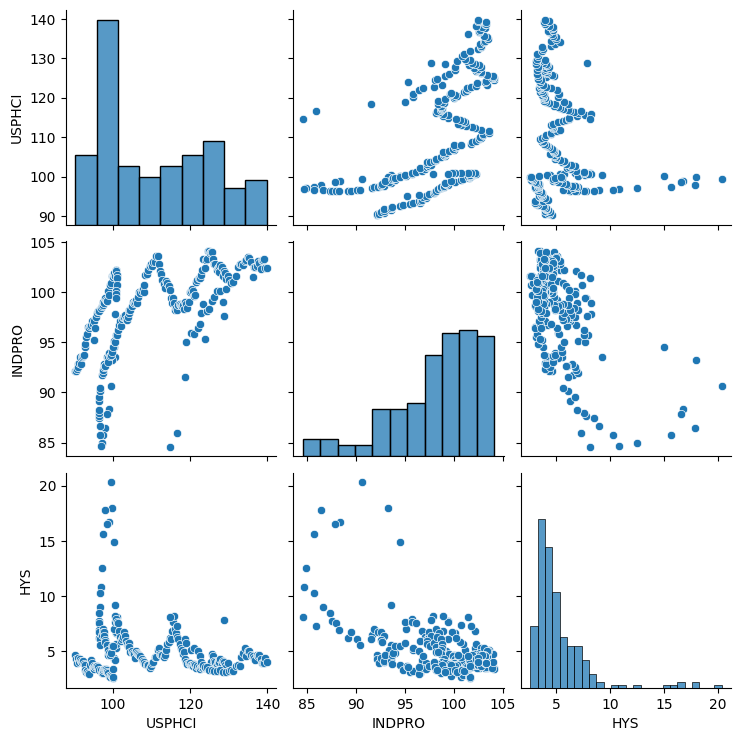

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(df_f)
plt.show()

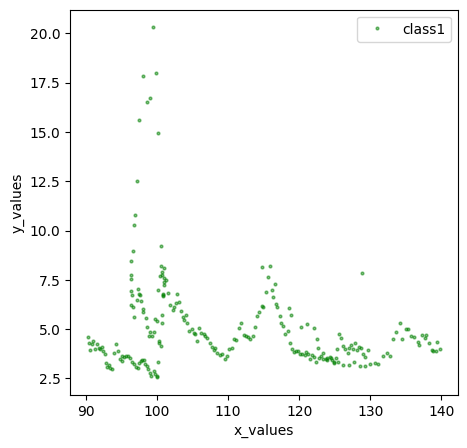

In [37]:
# 2차원 그리기

fig = plt.figure(figsize=(5,5))
X = df_f

plt.plot(  X.iloc[:,0]
         , X.iloc[:,2]
         , 'o'
         , markersize=2
         , color='green'
         , alpha=0.5
         , label='class1'
        )

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.legend() #범례표시
plt.show()

C:\Users\aztec\AppData\Local\Temp\ipykernel_5676\3985196635.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(  X.iloc[:,0]


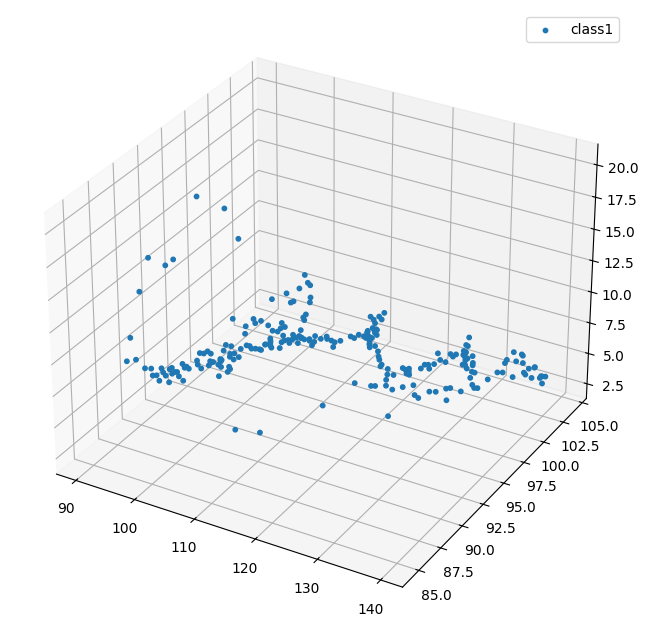

In [57]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap = "rainbow" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()


C:\Users\aztec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aztec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aztec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aztec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

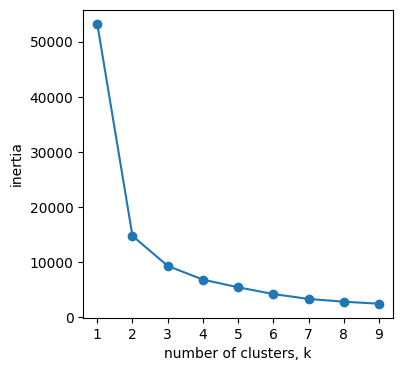

In [42]:
# K-Means cluster 

from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [43]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])


            0           1         2
0  115.222903   99.403771  4.892475
1  129.899194  101.946332  3.989401
2   98.311111   95.586826  5.956424
[2 2 2 2 2 2 2 2 2 2]


C:\Users\aztec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()


,USPHCI,INDPRO,HYS,clust
0,90.27,92.1265,4.617619,2
1,90.48,92.1722,4.280000,2
2,90.65,92.3270,3.940000,2
3,90.84,92.8873,4.258571,2
4,91.04,92.5325,4.401739,2


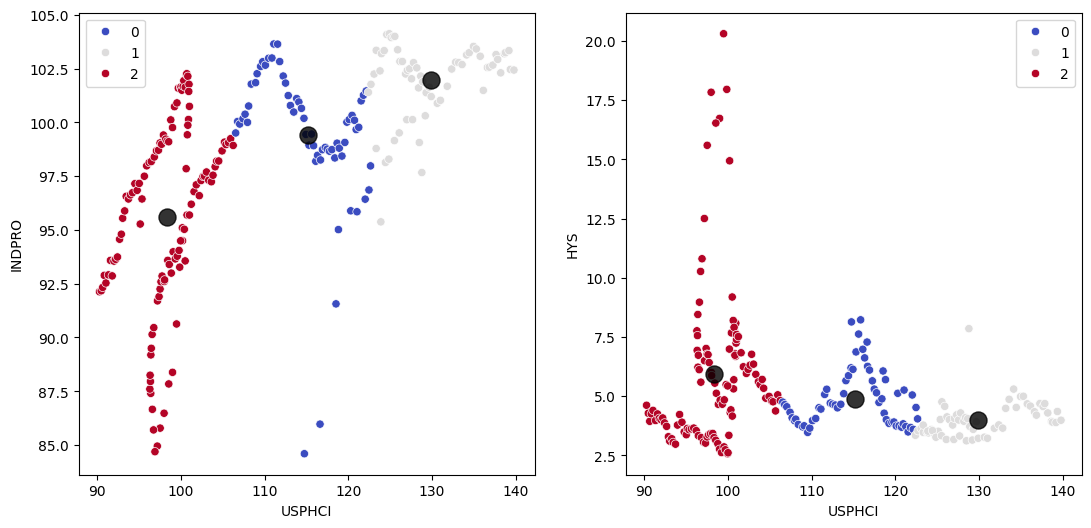

In [47]:
# scaling하지 않은 데이터를 학습하고 시각화하기

plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

# plt.subplot(133)
# sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df_f, hue=clust_model.labels_, palette='coolwarm')
# plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()


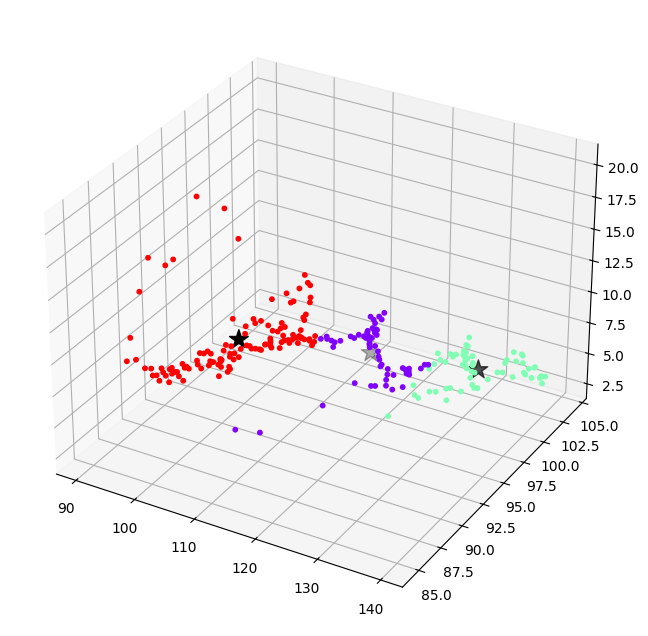

In [49]:
# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')


plt.show()


In [50]:
# 군집 별 특징 확인하기
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean


,USPHCI,INDPRO,HYS
clust,,,
0,115.222903,99.403771,4.892475
1,129.899194,101.946332,3.989401
2,98.311111,95.586826,5.956424


In [51]:
# 스케일링 하고 다시 군집분석하기

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_f.iloc[:,0:4]), columns=df_f.iloc[:,0:4].columns) # scaled된 데이터


In [52]:
# create model and prediction
# clust_model은 스케일링 전 fit과 동일하게 맞춤

clust_model.fit(scaled_df) # unsupervised learning #애초에 결과를 모르기 때문에 data만 넣어주면 됨

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

C:\Users\aztec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
# 스케일링 전에 합쳐준 데이터프레임에 스케일한 군집 컬럼 추가하기
clust_df['clust_s'] = pred_s
clust_df


,USPHCI,INDPRO,HYS,clust,clust_s
0,90.27,92.1265,4.617619,2,2
1,90.48,92.1722,4.280000,2,2
2,90.65,92.3270,3.940000,2,2
3,90.84,92.8873,4.258571,2,2
4,91.04,92.5325,4.401739,2,2
...,...,...,...,...,...
236,138.67,103.1900,3.937143,1,0
237,138.80,103.2411,3.903043,1,0
238,139.21,103.3346,3.889091,1,0
239,139.38,102.4592,4.355455,1,0


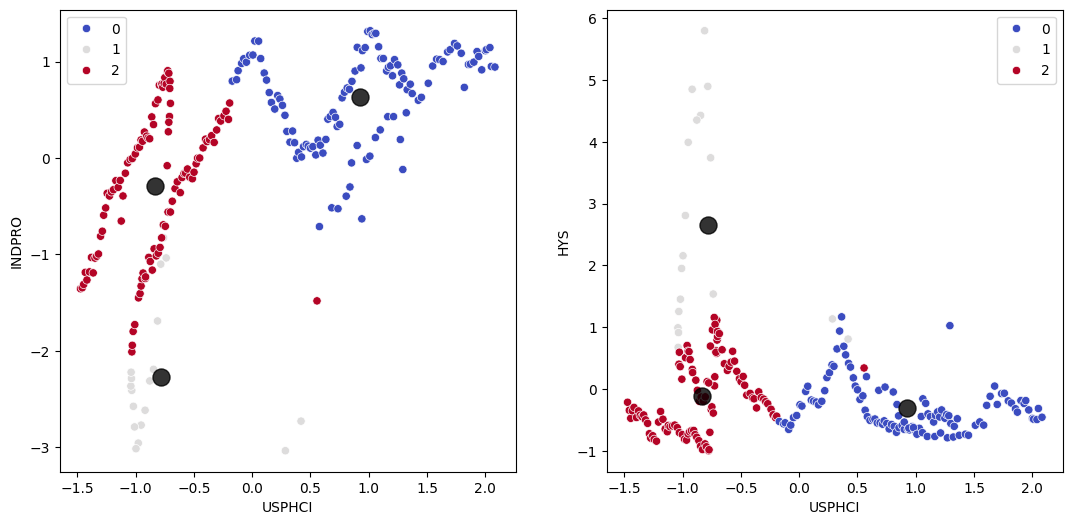

In [55]:
# scaling 완료한 데이터를 학습하고 시각화하기

plt.figure(figsize=(20, 6))

X = scaled_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers_s[:,0], centers_s[:,2], c='black', alpha=0.8, s=150)

# plt.subplot(133)
# sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=scaled_df, hue=clust_model.labels_, palette='coolwarm')
# plt.scatter(centers_s[:,0], centers_s[:,3], c='black', alpha=0.8, s=150)

plt.show()


In [73]:
# 스케일링 한 데이터와 안한 데이터의 군집 성능 비교하기
# 스케일링 전 데이터의 군집
pd.crosstab(clust_df['USPHCI'],clust_df['clust'])

# 스케일링 후 데이터의 군집
pd.crosstab(clust_df['USPHCI'], clust_df['clust_s'])


clust_s,0,1,2
USPHCI,,,
90.27,0,0,1
90.48,0,0,1
90.65,0,0,1
90.84,0,0,1
91.04,0,0,1
...,...,...,...
138.67,1,0,0
138.80,1,0,0
139.21,1,0,0


In [68]:
s.head()

clust,0,1,2
USPHCI,,,
90.27,0,0,2
90.48,0,0,2
90.65,0,0,2
90.84,0,0,2
91.04,0,0,2
